In [1]:
 # Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
 #import the dataset
titanic_train= pd.read_csv("/content/drive/MyDrive/Machine Learning Intern/Task 1 Titanic Machine Learning from Disaster/train.csv")
titanic_test=pd.read_csv('/content/drive/MyDrive/Machine Learning Intern/Task 1 Titanic Machine Learning from Disaster/test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data=titanic_train.copy()
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Display missing values in percentage
titanic_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
print(titanic_data.shape,titanic_test.shape)

(891, 12) (418, 11)


Survived: 0 = No, 1 = Yes

Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Cabin: Cabin number

Embarked: Port of Embarkation
 C = Cherbourg,
 Q = Queenstown,
 S = Southampton

In [8]:
titanic_data .describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Feature selection and data preprocessing

In [9]:
# drop the "Cabin" column from the dataframe ,it is almost empty
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
# PassengerId is not necessary
titanic_data = titanic_data.drop(columns='PassengerId', axis=1)

In [10]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [11]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
# check the number of missing values in each column
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Data Analysis

In [14]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data visualization

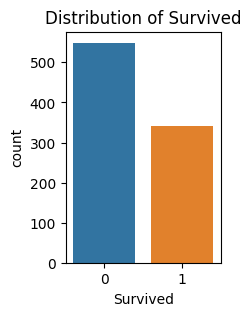

In [15]:
plt.figure(figsize=(2, 3))
sns.countplot(x = titanic_data['Survived'])
plt.title('Distribution of Survived')
plt.show()

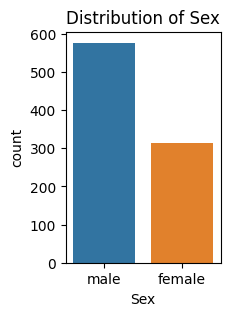

In [16]:
plt.figure(figsize=(2, 3))
sns.countplot(x = titanic_data['Sex'])
plt.title('Distribution of Sex')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

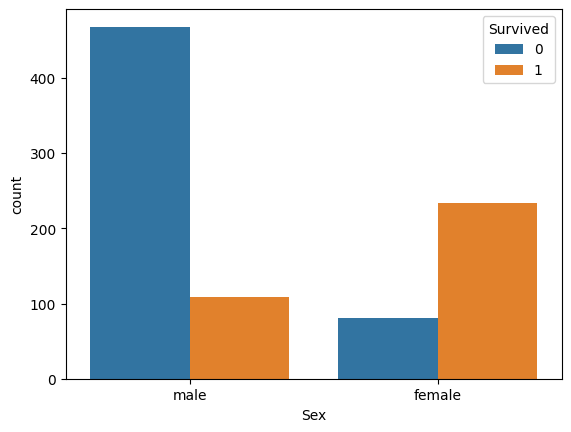

In [17]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

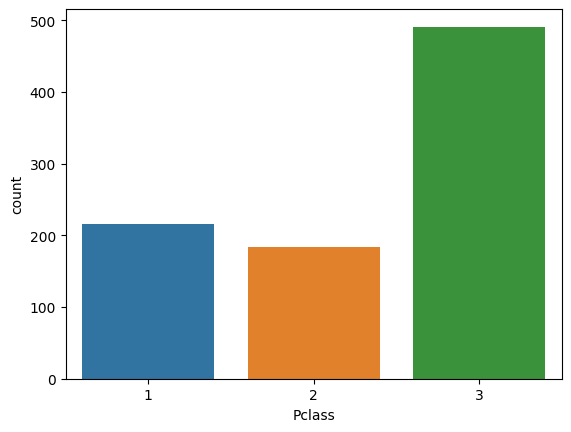

In [18]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

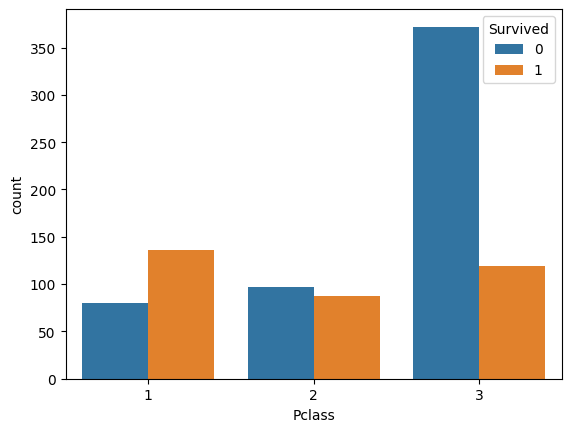

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

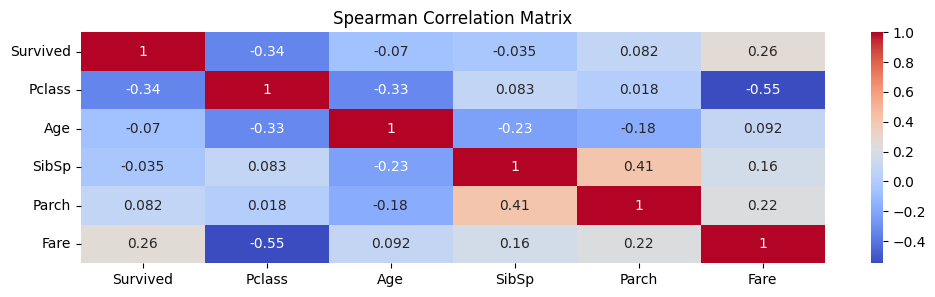

In [20]:
 # Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 3))
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Spearman Correlation Matrix')
plt.show()

### Encoding the Categorical Columns

In [21]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [24]:
#Separating features & Target
X = titanic_data.drop(columns = ['Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

### Splitting the data into training data & Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

### Model Training

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
classifiers = {
"Random Forest": RandomForestClassifier(random_state=42),
'Logistic Regression': LogisticRegression(random_state=42),
'SVC': SVC(),
'Wlleighbors': KNeighborsClassifier(),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'adatoost': AdaBoostClassifier (random_state=42)

}

# Train, evaluate, and select the best model
best_model = None
best_accuracy = 0

# Store accuracy scores and classification reports for all models
results = {}

for name, model in classifiers. items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    Classification_rep = classification_report(Y_test, y_pred)

    results[name] = {'accuracy': accuracy, 'classification_report': Classification_rep}


    print(f"{name} Accuracy:{accuracy})")
    print(f"{name} Classification Report:\n{Classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")

Random Forest Accuracy:0.8044692737430168)
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.81      0.72      0.77        79

    accuracy                           0.80       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

Logistic Regression Accuracy:0.7821229050279329)
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

SVC Accuracy:0.7877094972067039)
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       100
     

### Hyperparameter tuning

In [46]:
from sklearn.model_selection import ShuffleSplit

In [57]:
from sklearn.model_selection import GridSearchCV
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
          'svm': {
            'model': SVC(),
            'params': {
                'C': [1,5,10,20,40,50,60,100],
                'kernel': ['rbf', 'linear'],
                'gamma':['scale','auto']
            }
        },
        'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,40]
        }
    },
    'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini', 'log_loss', 'entropy'],
                'splitter': ['best','random']
            }
        },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
  'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
    },
          'adaboost': {
            'model': AdaBoostClassifier(estimator=DecisionTreeClassifier()),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1.0]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train_scaled, Y_train)

,model,best_score,best_params
0,logistic_regression,0.798601,{'C': 1}
1,svm,0.829371,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest,0.795804,{'n_estimators': 10}
3,decision_tree,0.767832,"{'criterion': 'entropy', 'splitter': 'best'}"
4,naive_bayes_gaussian,0.791608,{}
5,knn,0.820979,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}"
6,adaboost,0.752448,"{'learning_rate': 0.01, 'n_estimators': 50}"


select model with best score and best params

In [58]:
svm_model=RandomForestClassifier(n_estimators=40).fit(X_train_scaled,Y_train)
predicted=svm_model.predict(X_test_scaled)
score=accuracy_score(Y_test,predicted)
score1=svm_model.score(X_test_scaled,Y_test)
print('accuracy_score',score)

accuracy_score 0.7988826815642458


In [59]:
svm_model=SVC(C= 5, gamma='scale', kernel='rbf').fit(X_train_scaled,Y_train)
predicted=svm_model.predict(X_test_scaled)
score=accuracy_score(Y_test,predicted)
score1=svm_model.score(X_test_scaled,Y_test)
print('accuracy_score',score)

accuracy_score 0.7821229050279329


### Save model for deployment

In [62]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
svm_pkl_filename = '/content/drive/MyDrive/Machine Learning Intern/Task 1 Titanic Machine Learning from Disaster/Titanic.pkl'
# Open the file to save as pkl file
svm_Model_pkl = open(svm_pkl_filename, 'wb')
pickle.dump(svm_model, svm_Model_pkl)
# Close the pickle instances
svm_Model_pkl.close()